<a href="https://colab.research.google.com/github/fedassembly/tensorflow-cert-prep/blob/main/02_Neural_network_classification_with_TensorFlow_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?


**Higher Learning Rate**

| Pros                                                                                                                                                                                                                                                            | Cons                                                                                                                                                                                                                                                                                 |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Faster convergence**: A higher learning rate can lead to quicker <br>convergence during training. It allows the neural network to <br>update its weights more substantially in each iteration, <br>potentially reaching an optimal solution faster.              | **Overshooting the optimal solution**: With a higher learning rate, the model <br>might overshoot the optimal solution and fail to converge. Large weight <br>updates can cause the model to oscillate around the optimal point, <br>preventing it from settling into a stable solution. |
| **Escaping local optima**: A higher learning rate can help the <br>model escape from local optima. It enables the network to <br>make larger weight updates, potentially allowing it to <br>jump out of suboptimal solutions and find a better global <br>minimum. | **Instability and divergence**: Higher learning rates can lead to instability <br>during training. If the learning rate is too high, the weights can become <br>very large, and the model may fail to converge or even diverge entirely.                                                 |
|                                                                                                                                                                                                                                                                | **Skipping over local optima**: While escaping local optima can be an <br>advantage, a higher learning rate can also cause the model to skip <br>over smaller, yet valuable, local optima. This can lead to a <br>suboptimal or inferior solution.                                       |

**Lower Learning Rate**

| Pros                                                                                                                                                                                                                                                                            | Cons                                                                                                                                                                                                                                                              |
|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Improved stability**: Smaller learning rates provide more <br>stability during training. By making smaller weight <br>adjustments, the model is less likely to oscillate or <br>diverge, leading to a more reliable and consistent <br>convergence.                              | **Slower convergence**: A smaller learning rate requires more iterations for <br>the model to converge. It takes longer to reach an optimal solution as <br>weight updates are relatively smaller in each iteration.                                                  |
| **Precise fine-tuning**: Smaller learning rates allow for <br>more precise fine-tuning of the model. When close to <br>the optimal solution, a smaller learning rate helps <br>the model to make subtle adjustments, improving its <br>performance without making drastic changes. | **Getting stuck in local optima**: With a smaller learning rate, the model <br>may get stuck in local optima more often. The limited weight <br>adjustments can hinder the model's ability to escape suboptimal <br>solutions, resulting in less optimal performance. |

2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*


In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
import random
import math
import numpy as np

def classify_circle_data(num_samples: int, noise: float) -> tuple:
    """
    Generate circle data points.

    Python version of TypeScript code of Tensorflow playground
    https://github.com/tensorflow/playground/blob/master/src/dataset.ts

    Parameters
    ----------
    num_samples : int
        Number of samples to generate.
    noise : float
        Noise factor applied to the points.

    Returns
    -------
    X : numpy.ndarray
        Array of shape (num_samples, 2) containing the x1 and x2 coordinates.
    y : numpy.ndarray
        Array of shape (num_samples,) containing the labels.
    """
    points = []
    radius = 5
    def get_circle_label(p: tuple, center: tuple) -> int:
        return 1 if dist(p, center) < (radius * 0.5) else 0
    def dist(p: tuple, center: tuple) -> float:
        return math.sqrt((p[0] - center[0]) ** 2 + (p[1] - center[1]) ** 2)
    # Generate positive points inside the circle.
    for _ in range(num_samples // 2):
        r = random.uniform(0, radius * 0.5)
        angle = random.uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = random.uniform(-radius, radius) * noise
        noiseY = random.uniform(-radius, radius) * noise
        label = get_circle_label(p=(x + noiseX, y + noiseY), center=(0, 0))
        points.append((x, y, label))
    # Generate negative points outside the circle.
    for _ in range(num_samples // 2):
        r = random.uniform(radius * 0.7, radius)
        angle = random.uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = random.uniform(-radius, radius) * noise
        noiseY = random.uniform(-radius, radius) * noise
        label = get_circle_label(p=(x + noiseX, y + noiseY), center=(0, 0))
        points.append((x, y, label))
    X = np.array(points)[:, :2]
    y = np.array(points)[:, 2]
    return X, y

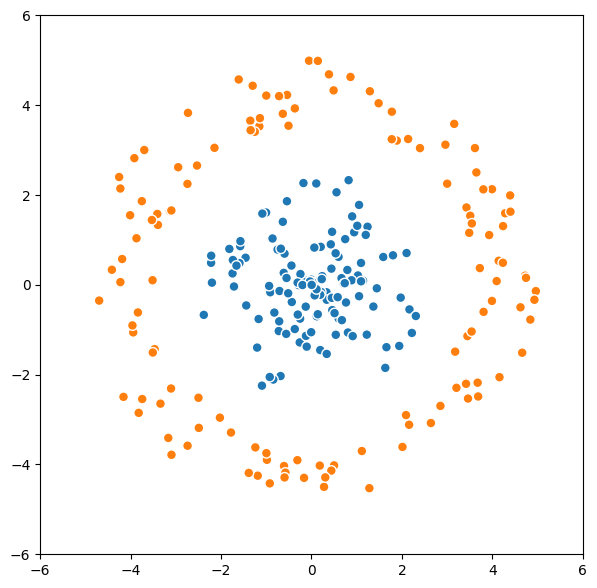

In [3]:
X, y = classify_circle_data(250, 0)
plt.rcParams["figure.figsize"] = [7, 7]
plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=ListedColormap(["tab:orange", "tab:blue"]),
                s=50,
                edgecolors="white", linewidth=1)
plt.xlim([-6, 6])
plt.ylim([-6, 6]);

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, input_shape = (2,), activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

history = model_1.fit(X_train, y_train, batch_size = 10, epochs = 40,
                      validation_data=(X_test, y_test))

Epoch 1/40
20/20 [==============================] - 11s 42ms/step - loss: 0.6648 - accuracy: 0.5450 - val_loss: 0.6595 - val_accuracy: 0.5000
Epoch 2/40
20/20 [==============================] - 0s 20ms/step - loss: 0.6474 - accuracy: 0.5750 - val_loss: 0.6467 - val_accuracy: 0.4600
Epoch 3/40
20/20 [==============================] - 0s 9ms/step - loss: 0.6284 - accuracy: 0.6150 - val_loss: 0.6323 - val_accuracy: 0.4800
Epoch 4/40
20/20 [==============================] - 0s 14ms/step - loss: 0.6051 - accuracy: 0.6650 - val_loss: 0.6162 - val_accuracy: 0.5200
Epoch 5/40
20/20 [==============================] - 0s 12ms/step - loss: 0.5750 - accuracy: 0.6750 - val_loss: 0.5954 - val_accuracy: 0.6000
Epoch 6/40
20/20 [==============================] - 0s 11ms/step - loss: 0.5435 - accuracy: 0.6900 - val_loss: 0.5795 - val_accuracy: 0.6600
Epoch 7/40
20/20 [==============================] - 0s 10ms/step - loss: 0.5185 - accuracy: 0.7300 - val_loss: 0.5542 - val_accuracy: 0.7400
Epoch 8/40
20

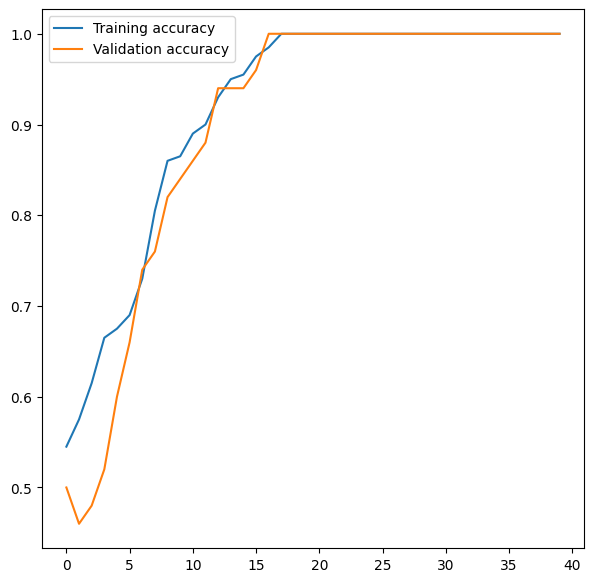

In [6]:
plt.plot(history.history["accuracy"], label = "Training accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend();

In [7]:
def plot_decision_boundary(model: tf.keras.Model,
                           X: np.array,
                           y: np.array,) -> None:
  """
  Plot the decision boundary of a classification model.

  Parameters
  ----------
  model : tf.keras.Model
      Trained sequential model.
  X : numpy.ndarray
      Input data of shape (n_samples, 2).
  y : numpy.ndarray
      Target labels of shape (n_samples,).

  Returns
  -------
  None
      The function plots the decision boundary.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]
  # Make predictions using the trained model
  y_pred = model.predict(x_in, verbose=0)
  # Check for multi-class
  if model.output_shape[-1] > 1:
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=ListedColormap(["tab:orange", "tab:blue"]),
               alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=ListedColormap(["tab:orange", "tab:blue"]),
                s=50,
                edgecolors="white", linewidth=1)

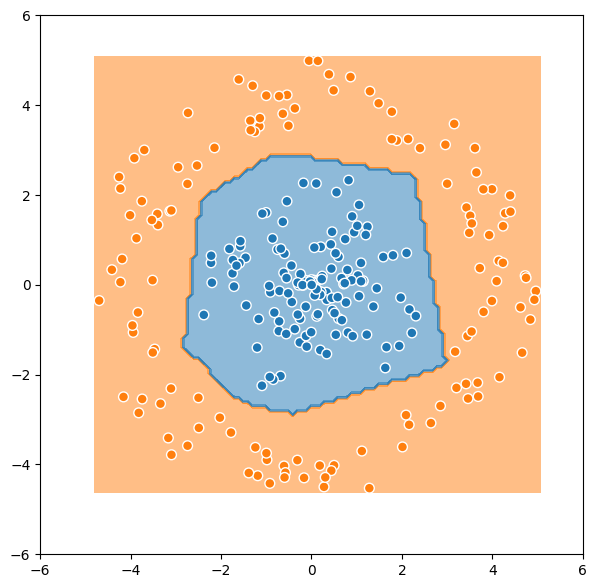

In [8]:
plot_decision_boundary(model_1, X, y)
plt.xlim([-6, 6])
plt.ylim([-6, 6]);

3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.


In [9]:
from sklearn.datasets import make_moons

In [10]:
X, y = make_moons()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

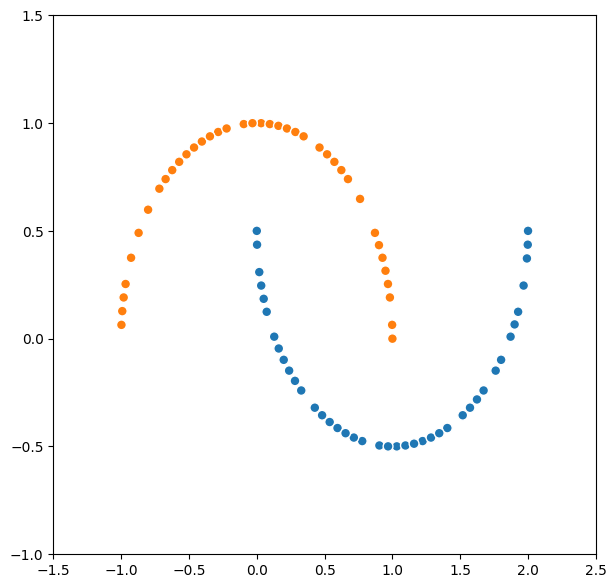

In [11]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                cmap=ListedColormap(["tab:orange", "tab:blue"]),
                s=50,
                edgecolors="white", linewidth=1)
plt.xlim([-1.5, 2.5])
plt.ylim([-1, 1.5]);

In [12]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=(2,), activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 4**(epoch/20))

history = model_2.fit(X_train, y_train, epochs=100,
                      callbacks=[lr_scheduler],
                      validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 1s 97ms/step - loss: 0.5952 - accuracy: 0.7125 - val_loss: 0.6303 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5925 - accuracy: 0.7125 - val_loss: 0.6272 - val_accuracy: 0.6000 - lr: 0.0011
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5900 - accuracy: 0.7250 - val_loss: 0.6239 - val_accuracy: 0.6000 - lr: 0.0011
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5872 - accuracy: 0.7250 - val_loss: 0.6202 - val_accuracy: 0.6000 - lr: 0.0012
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5844 - accuracy: 0.7250 - val_loss: 0.6162 - val_accuracy: 0.6000 - lr: 0.0013
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5810 - accuracy: 0.7250 - val_loss: 0.6121 - val_accuracy: 0.6500 - lr: 0.0014
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5777 - a

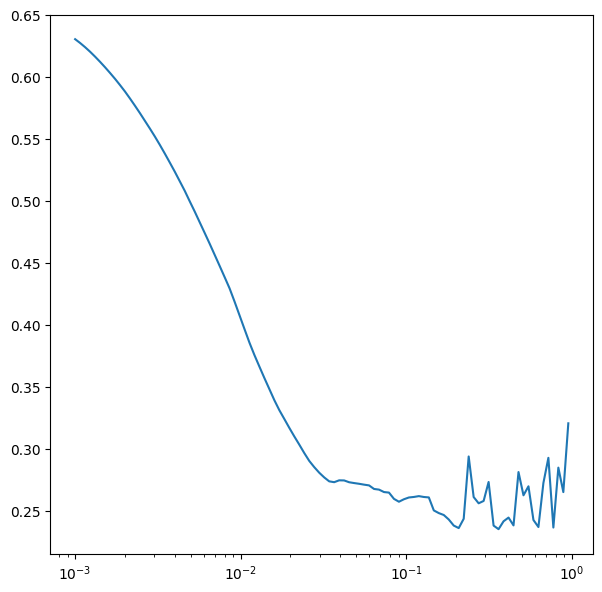

In [13]:
plt.semilogx(history.history["lr"], history.history["val_loss"])

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=(2,), activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
                metrics=["accuracy"])

history = model_2.fit(X_train, y_train, epochs=100,
                      validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 1s 103ms/step - loss: 0.7875 - accuracy: 0.3125 - val_loss: 0.5516 - val_accuracy: 0.6500
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5282 - accuracy: 0.7250 - val_loss: 0.4173 - val_accuracy: 0.7500
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.3975 - accuracy: 0.8125 - val_loss: 0.3590 - val_accuracy: 0.8000
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.3504 - accuracy: 0.8250 - val_loss: 0.3352 - val_accuracy: 0.9000
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.3235 - accuracy: 0.8250 - val_loss: 0.3099 - val_accuracy: 0.9000
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3039 - accuracy: 0.8500 - val_loss: 0.2886 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.2951 - accuracy: 0.8500 - val_loss: 0.2810 - val_accuracy: 0.9000
Epoch 8/100
3/3 [==

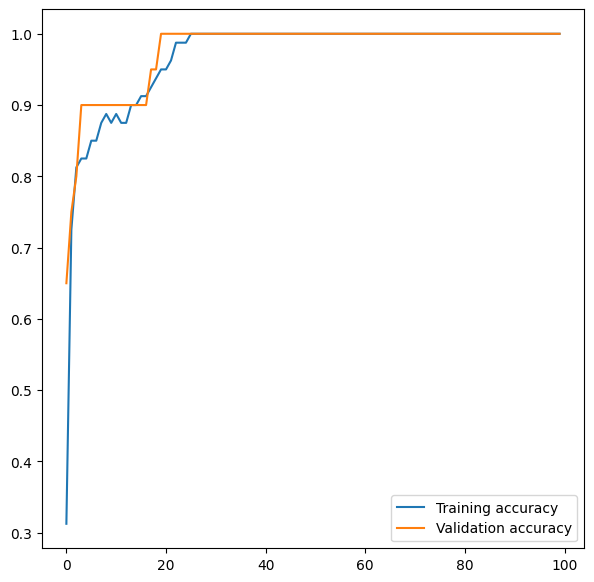

In [15]:
plt.plot(history.history["accuracy"], label = "Training accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend();

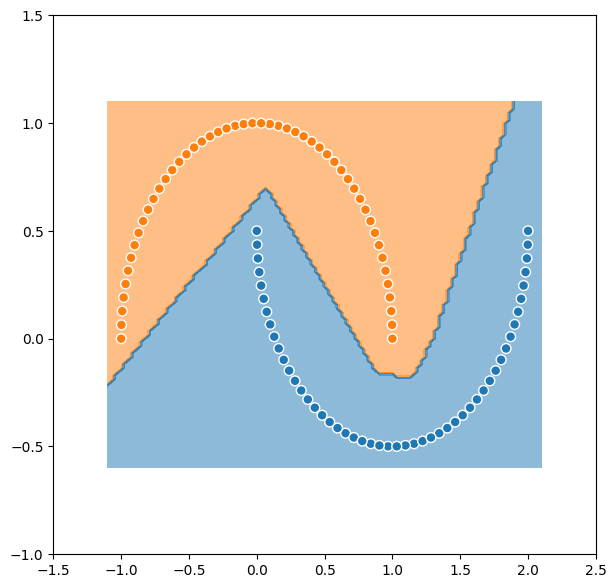

In [16]:
plot_decision_boundary(model_2, X, y)
plt.xlim([-1.5, 2.5])
plt.ylim([-1, 1.5]);

4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.


In [17]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape, X_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

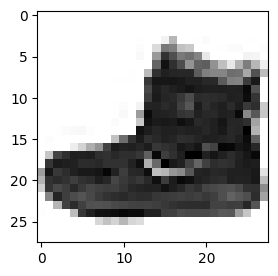

In [18]:
plt.rcParams["figure.figsize"] = [3, 3]
plt.imshow(X_train[0].reshape((28,28)), cmap=plt.cm.binary);

In [19]:
X_train[0].reshape(-1).shape

(784,)

In [20]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
# tf.random.set_seed(42)

# model_3 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, input_shape=(784,), activation="relu"),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(16, activation="relu"),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])

# model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# history = model_3.fit(X_train, y_train, batch_size=32,
#                       callbacks=[lr_scheduler],
#                       epochs=20, validation_data=(X_test, y_test))

In [22]:
plt.rcParams["figure.figsize"] = [7, 7]
# plt.semilogx(history.history["lr"], history.history["val_loss"])

In [23]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, input_shape=(784,), activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0015),
                metrics=["accuracy"])

history = model_3.fit(X_train, y_train, batch_size=32,
                      epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5287 - accuracy: 0.8093 - val_loss: 0.4674 - val_accuracy: 0.8338
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3834 - accuracy: 0.8599 - val_loss: 0.4342 - val_accuracy: 0.8494
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3467 - accuracy: 0.8721 - val_loss: 0.3868 - val_accuracy: 0.8630
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3241 - accuracy: 0.8820 - val_loss: 0.3799 - val_accuracy: 0.8626
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3060 - accuracy: 0.8878 - val_loss: 0.3728 - val_accuracy: 0.8704
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2919 - accuracy: 0.8912 - val_loss: 0.3842 - val_accuracy: 0.8642
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2826 - accuracy: 0.8962 - val_loss: 0.3677 - val_accuracy

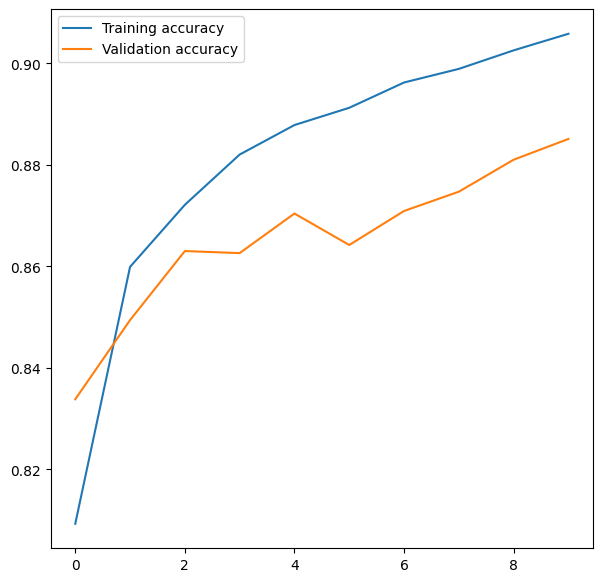

In [24]:
plt.plot(history.history["accuracy"], label = "Training accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend();

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
y_proba_pred = model_3.predict(X_test)
y_pred = np.argmax(y_proba_pred, 1)
y_proba_pred.shape, y_pred.shape

313/313 [==============================] - 1s 2ms/step


((10000, 10), (10000,))

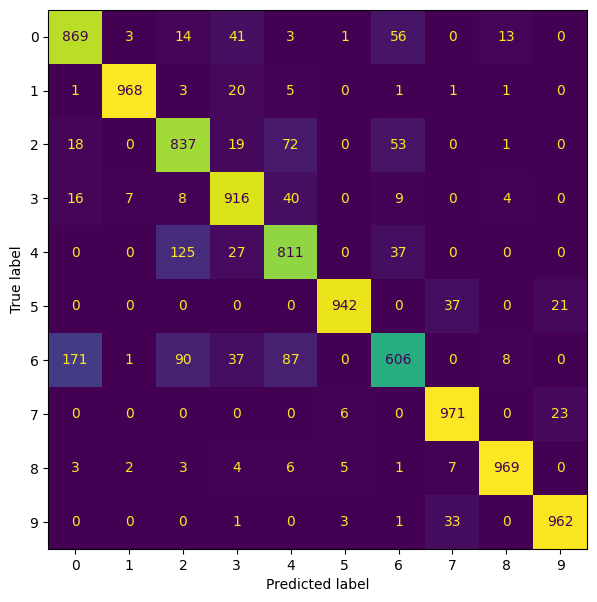

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_train))
disp.plot(colorbar=False);

In [28]:
zero_instead_six = X_test[(y_test == 6) & (y_pred == 0)]
zero_instead_six.shape

(171, 28, 28)

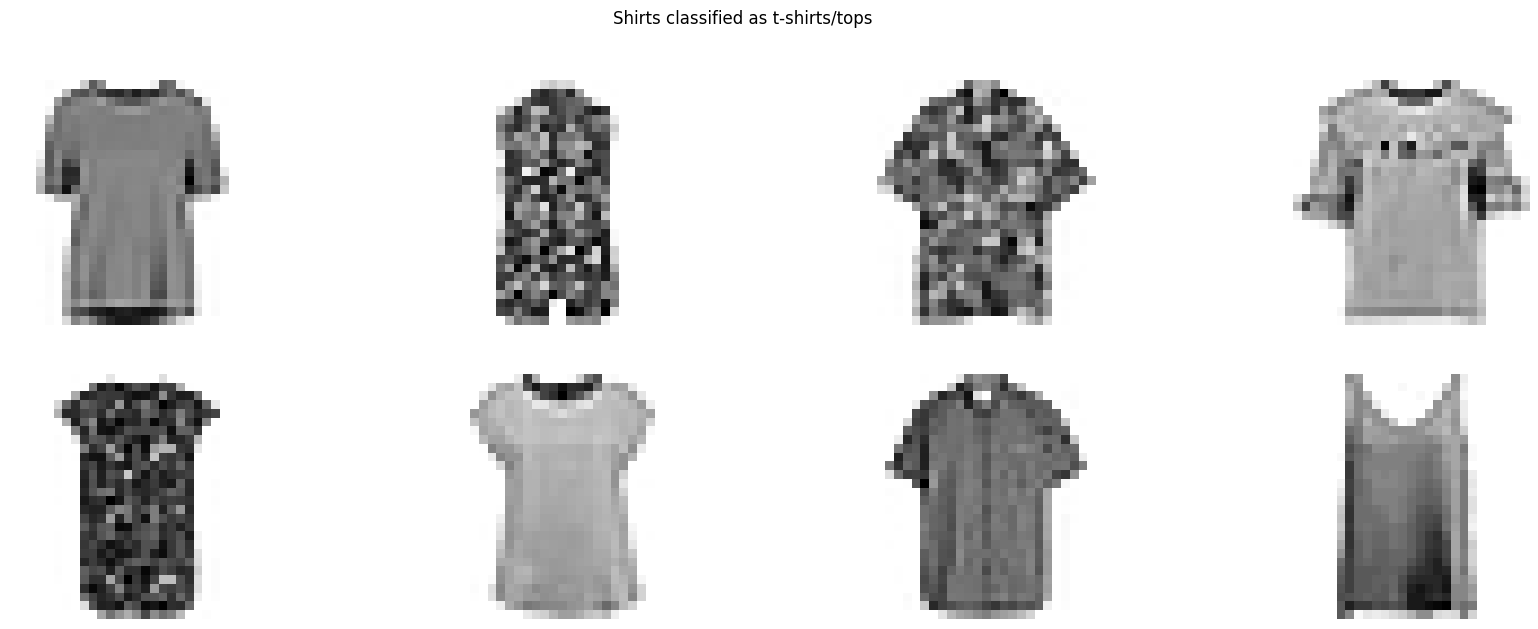

In [29]:
plt.figure(figsize=(21,7))
for i in range(8):
  ax = plt.subplot(2, 4, i + 1)
  rand_index = random.choice(range(len(zero_instead_six)))
  plt.imshow(zero_instead_six[rand_index], cmap=plt.cm.binary)
  plt.axis(False)
plt.suptitle("Shirts classified as t-shirts/tops");

5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.


In [30]:
random_tensor = tf.random.normal(shape=(3, 5))
random_tensor

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.3274685 , -0.8426258 ,  0.3194337 , -1.4075519 , -2.3880599 ],
       [-1.0392479 , -0.5573232 ,  0.539707  ,  1.6994323 ,  0.28893656],
       [-1.5066116 , -0.2645474 , -0.59722406, -1.9171132 , -0.62044144]],
      dtype=float32)>

In [31]:
softmax_probs = tf.keras.activations.softmax(random_tensor)

In [32]:
def my_softmax(x):
  return tf.math.exp(x) / tf.reduce_sum(tf.math.exp(random_tensor), axis=1,
                                        keepdims=True)

In [33]:
my_softmax(random_tensor)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0.39294252, 0.12194487, 0.38979796, 0.06931373, 0.026001  ],
       [0.03743942, 0.06062146, 0.18157686, 0.579059  , 0.14130329],
       [0.09965425, 0.34507814, 0.24742174, 0.06610241, 0.24174342]],
      dtype=float32)>

In [34]:
softmax_probs

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0.3929425 , 0.12194487, 0.38979793, 0.06931372, 0.026001  ],
       [0.03743942, 0.06062146, 0.18157688, 0.57905895, 0.14130329],
       [0.09965426, 0.3450782 , 0.24742177, 0.06610242, 0.24174345]],
      dtype=float32)>

6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.


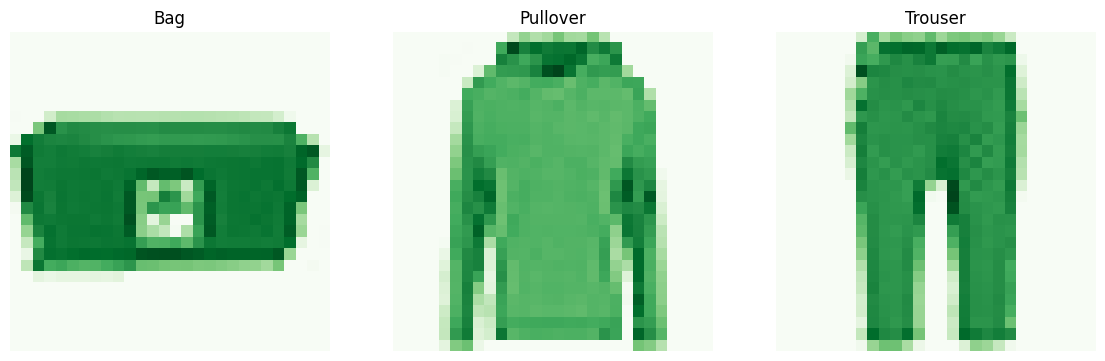

In [35]:
plt.figure(figsize=(14,7))
classes_labels = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress",
                           "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
                           "Ankle boot"])
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  rand_index = random.choice(range(X_test.shape[0]))
  true_label = classes_labels[y_test[rand_index]]
  y_proba_pred = model_3.predict(tf.expand_dims(X_test[rand_index], axis=0),
                                 verbose=0)
  pred_label = classes_labels[np.argmax(y_proba_pred)]
  if true_label == pred_label:
    plt.imshow(X_test[rand_index], cmap=plt.cm.Greens)
    plt.title(f"{pred_label}")
  else:
    plt.imshow(X_test[rand_index], cmap=plt.cm.Reds)
    plt.title(f"{pred_label} (True={true_label})")
  plt.axis(False);

7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

In [36]:
plt.rcParams["figure.figsize"] = [3, 3]
def plot_class_with_prediction(label):
  target_class_idx = np.argwhere(classes_labels == label)[0]
  target_y_test = np.argwhere(y_test == target_class_idx)
  rand_index = random.choice(target_y_test)
  y_proba_pred = model_3.predict(X_test[rand_index], verbose=0)
  pred_label = classes_labels[np.argmax(y_proba_pred)]
  if label == pred_label:
    plt.imshow(X_test[rand_index].squeeze(), cmap=plt.cm.Greens)
  else:
    plt.imshow(X_test[rand_index].squeeze(), cmap=plt.cm.Reds)
    plt.title(pred_label)
  plt.axis(False);

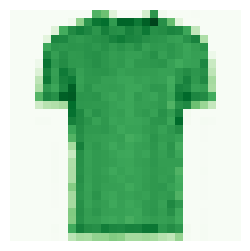

In [37]:
plot_class_with_prediction("T-shirt/top")